In [6]:
import sys 
sys.path.append('../..')

from models import TMCDensityEstimator,AutoregressiveTMCDensityEstimator

from models import TestTMCDensityEstimator, EMDensityEstimator

from targets import Target
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from models import MixedModelDensityEstimator
from models import MixedModelSampler
from models import TMCSamplerLayer
from models import TMCDensityEstimatorLayer
from models import TMCSampler
from models import RealNVPSamplerLayer
from models import RealNVPDensityEstimatorLayer
from models import MADELayer
from models import GeneralizedMultivariateNormal
from targets import Target
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


tensor([[ 0.0372,  0.0072,  0.0669,  ...,  0.5310, -0.0704, -0.1179],
        [-0.0787,  0.0577, -0.1676,  ...,  1.0778, -0.0457, -0.0332],
        [-0.0489,  0.0184,  0.1047,  ...,  0.9856,  0.2594,  0.0387],
        ...,
        [ 0.0916, -0.1347,  0.0519,  ...,  0.7162,  0.0236, -0.0933],
        [ 0.1585,  0.0481,  0.4610,  ...,  0.4637,  0.0771, -0.0069],
        [ 0.0936,  0.0536,  0.3935,  ...,  0.2330,  0.0728,  0.0336]])
number of training samples182


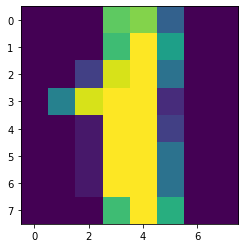

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digit = 1

extracted = digits.data[digits.target == digit]
plt.imshow(digits.images[digits.target == digit][0])
target_samples = torch.tensor(extracted).float()
target_samples = (target_samples + torch.randn(target_samples.shape))/16
print(target_samples)
p = target_samples.shape[1]
num_samples = target_samples.shape[0]

print("number of training samples"  +str(num_samples))
train_set, test_set = target_samples[:120], target_samples[120:]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:03<00:00,  5.44it/s, loss = -125.86363983154297]


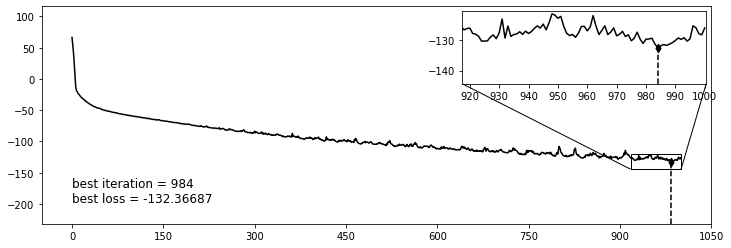

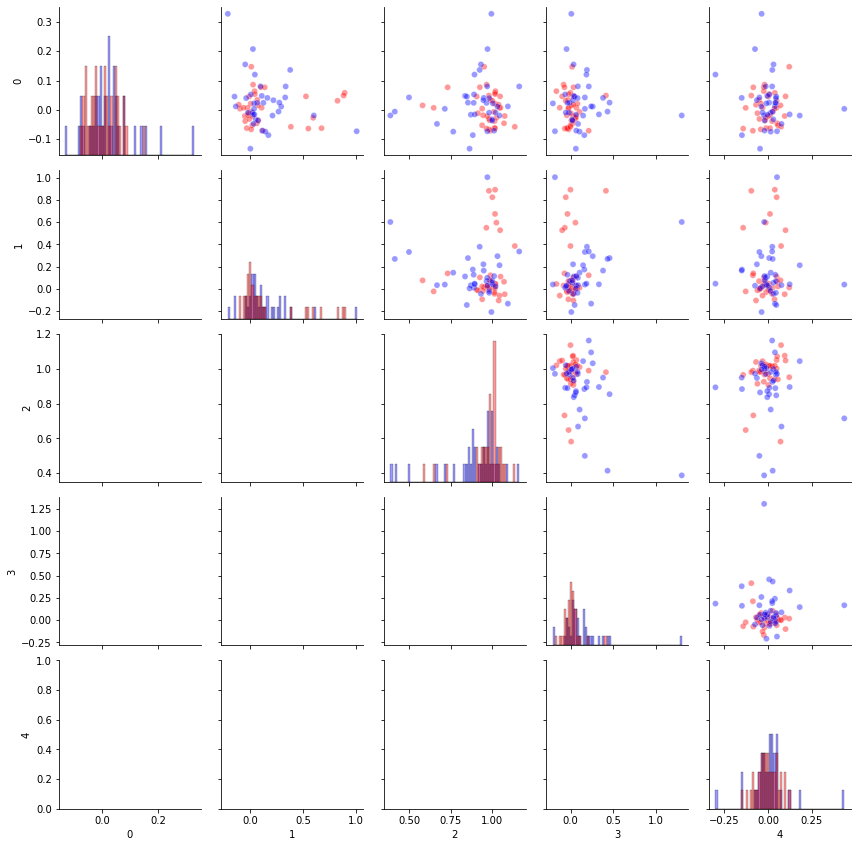

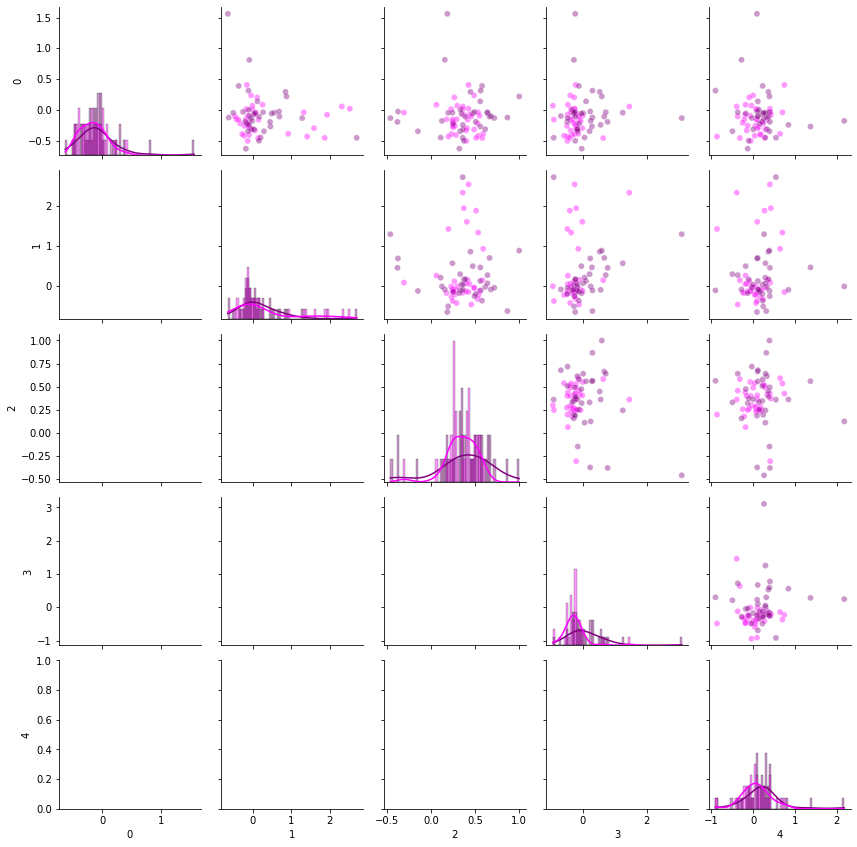

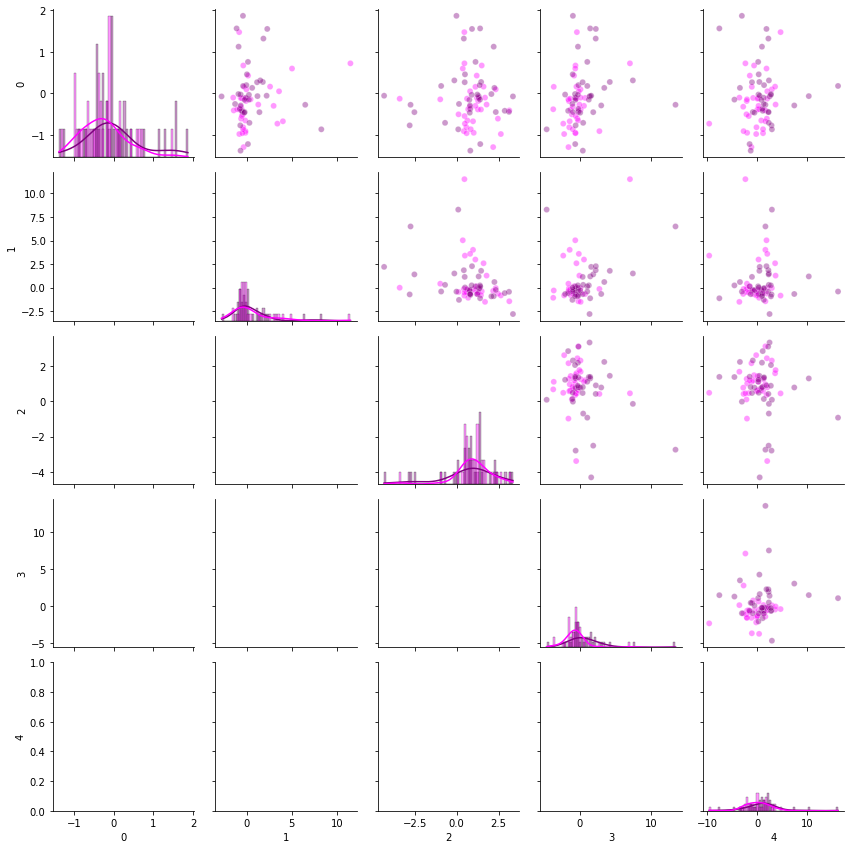

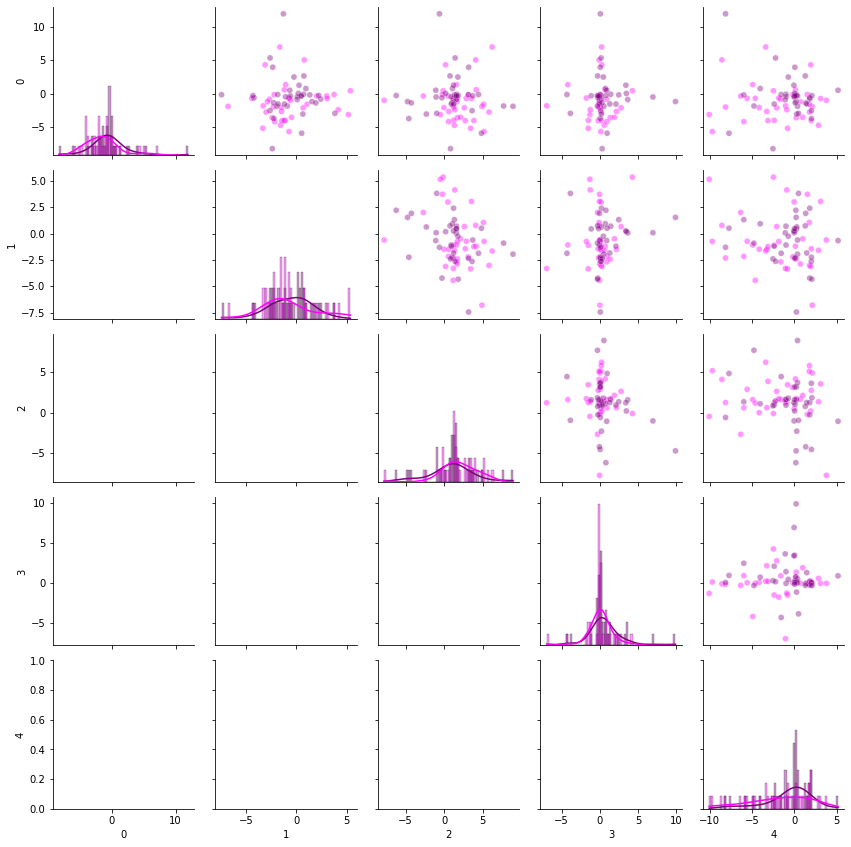

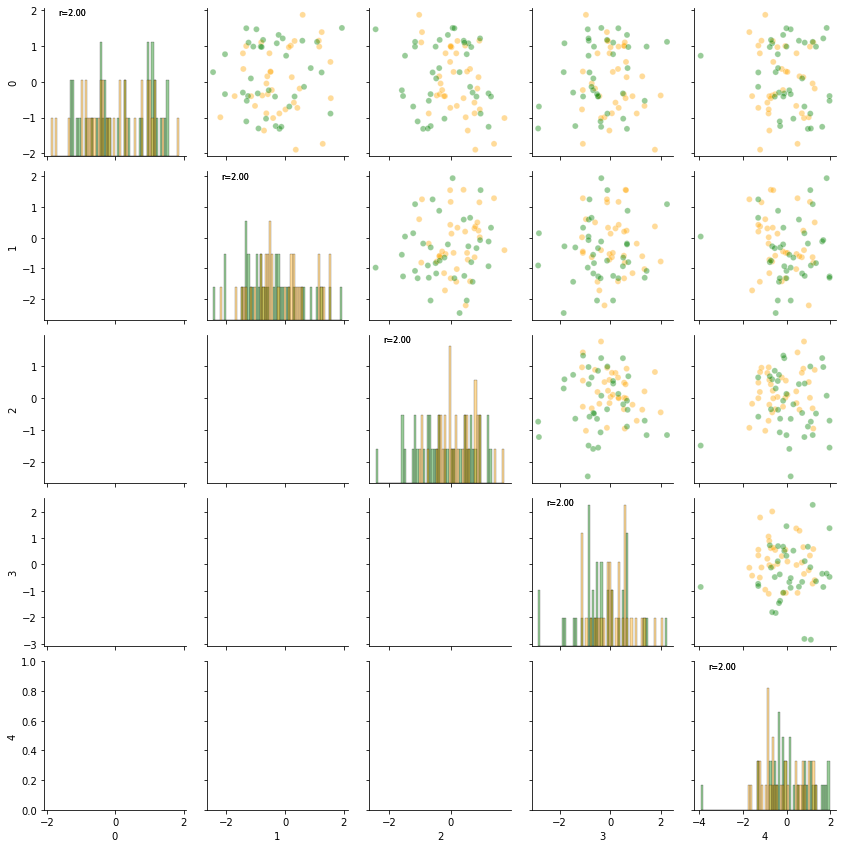

In [17]:
num_samples = target_samples.shape[0]
epochs =1000
batch_size = int(num_samples/12)
structure = [[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]]]
realnvp = MixedModelDensityEstimator(target_samples, p,structure, initial_reference = GeneralizedMultivariateNormal(p, fixed_log_r = torch.log(2*torch.ones(p))))
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:01<00:00,  5.50it/s, loss = -173.3555450439453]


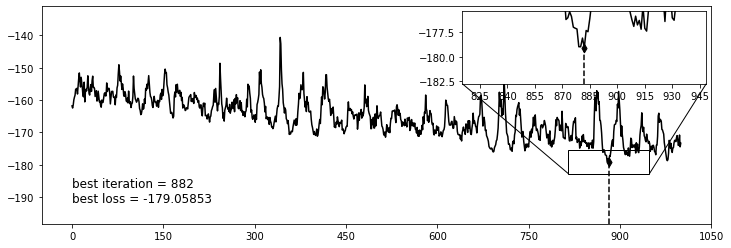

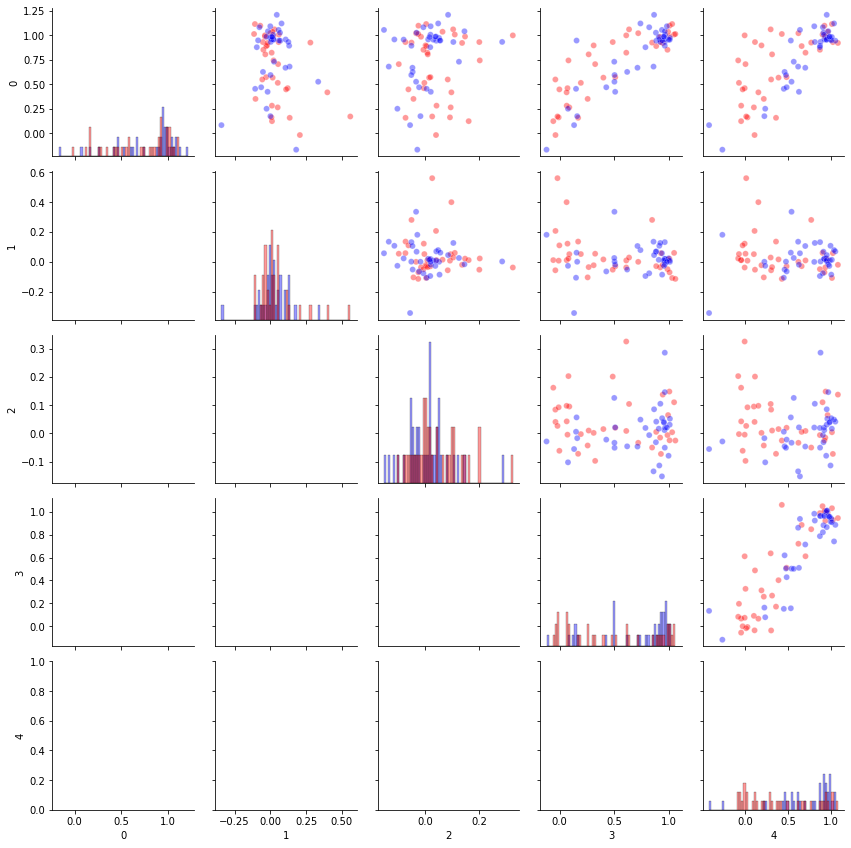

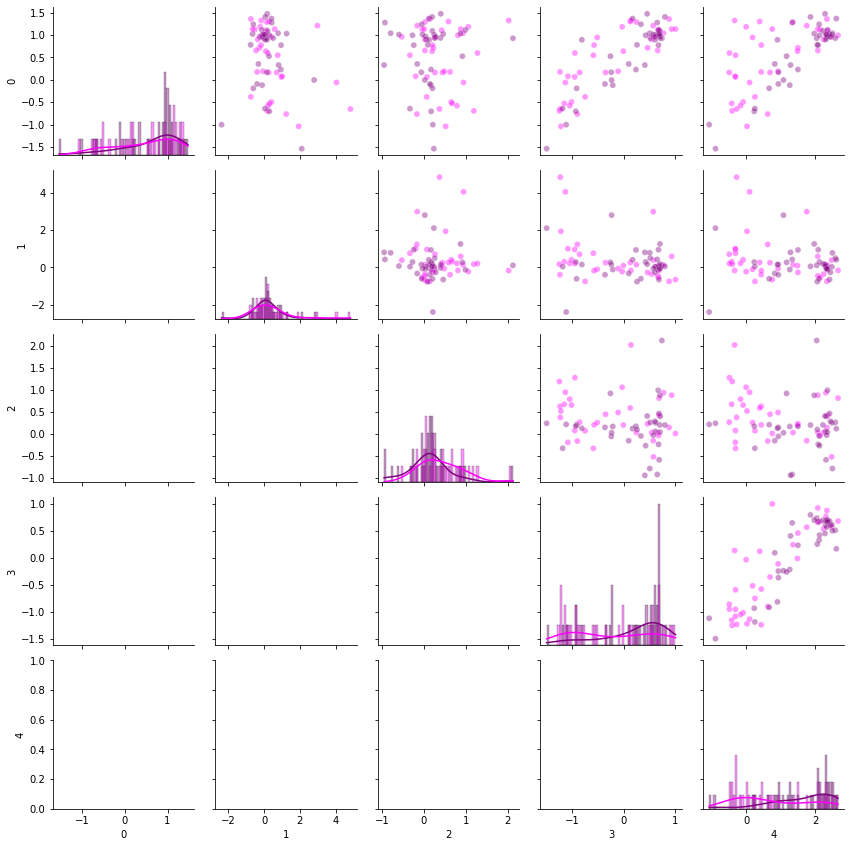

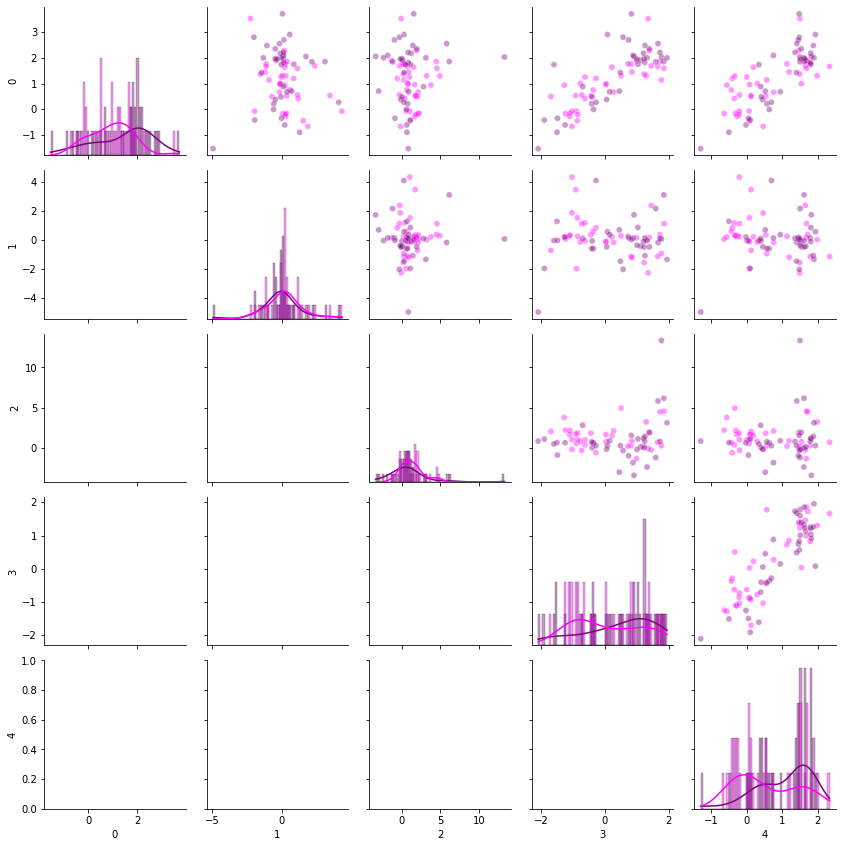

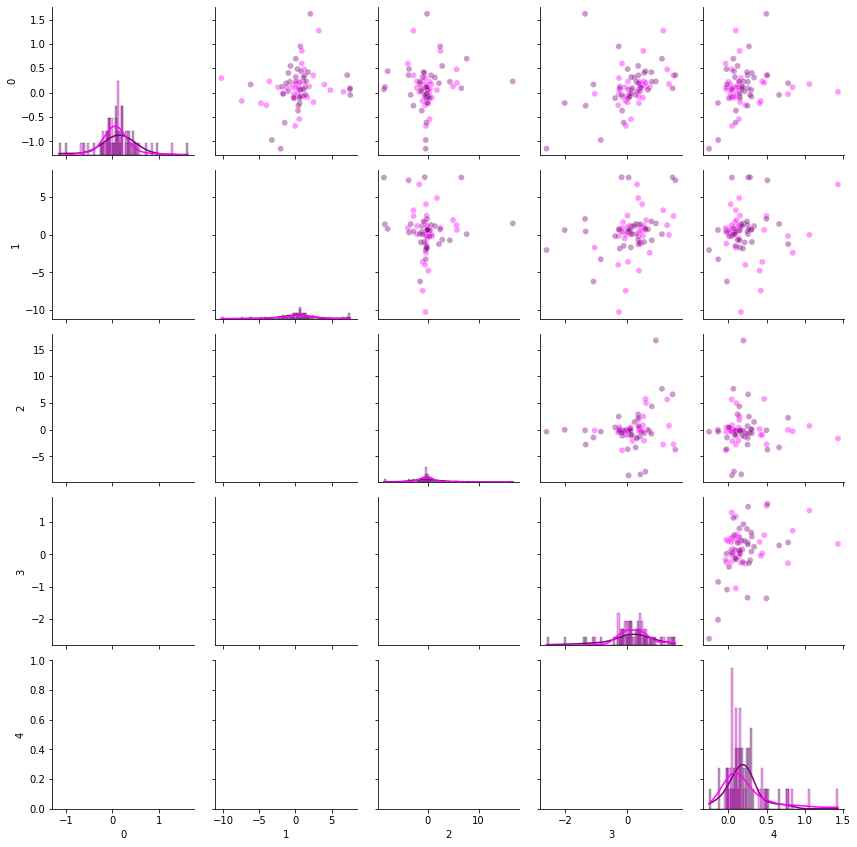

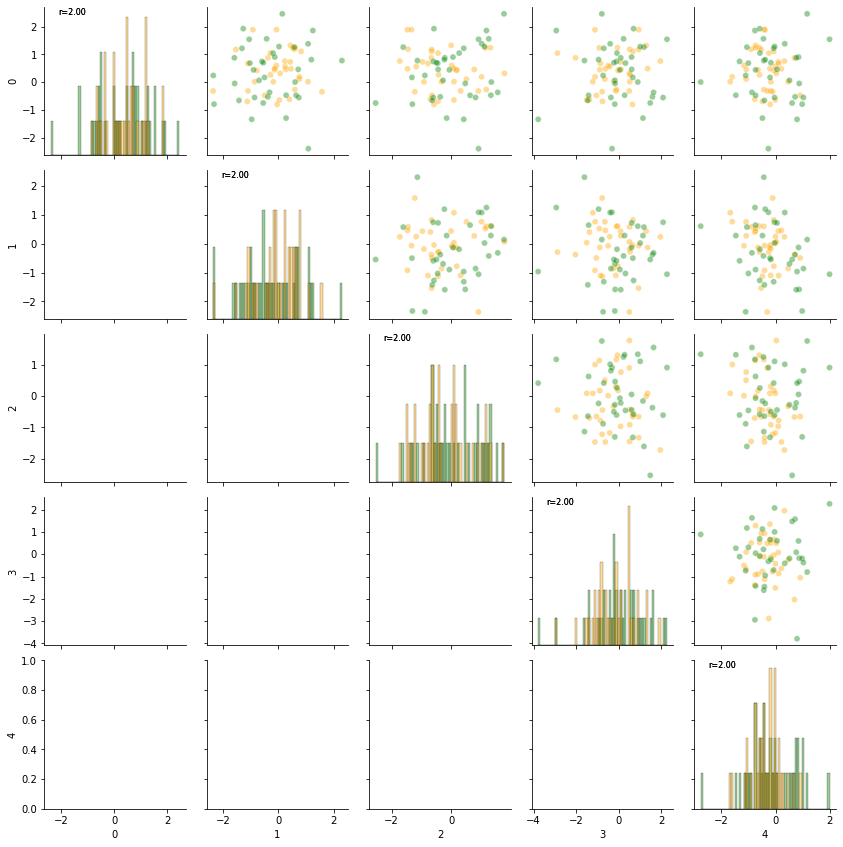

In [21]:
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

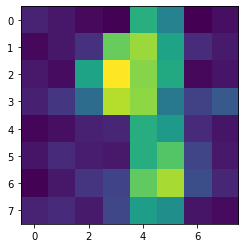

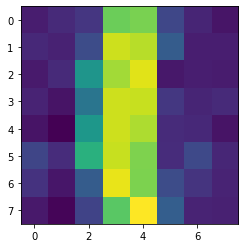

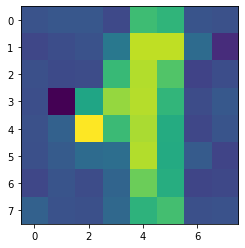

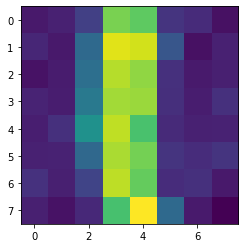

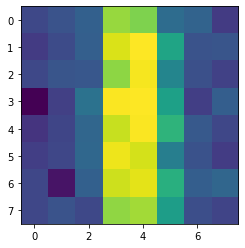

In [22]:
for _ in range(5):
    plt.figure()
    plt.imshow(realnvp.sample_model(1).detach().reshape(8,8))

number of samples = 5958


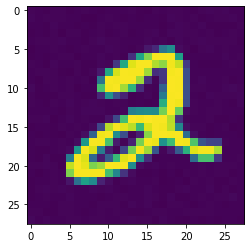

In [34]:
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
from models.Standard_TMC.tmc_density_estimator import TMCDensityEstimator
images = mnist_trainset.data.flatten(start_dim=1)
targets = mnist_trainset.targets

digit = 2
#digit = 'all'
if digit != 'all':
    extracted = images[targets == digit] 
else: 
    extracted = images
target_samples = (extracted + torch.randn(extracted.shape))

num_samples  = target_samples.shape[0]
print('number of samples = ' + str(num_samples))
p = target_samples.shape[-1]
plt.imshow(target_samples[0].reshape(28,28))

train_set, test_set = target_samples[:4000], target_samples[4000:]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [09:06<00:00,  2.73s/it, loss = 2394.46875]


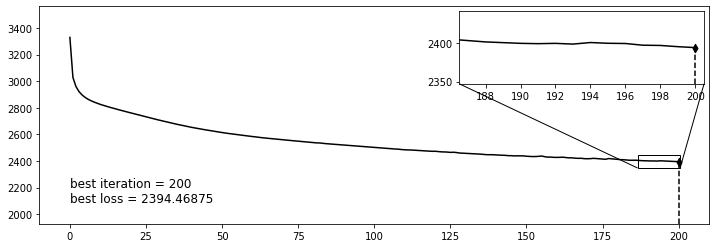

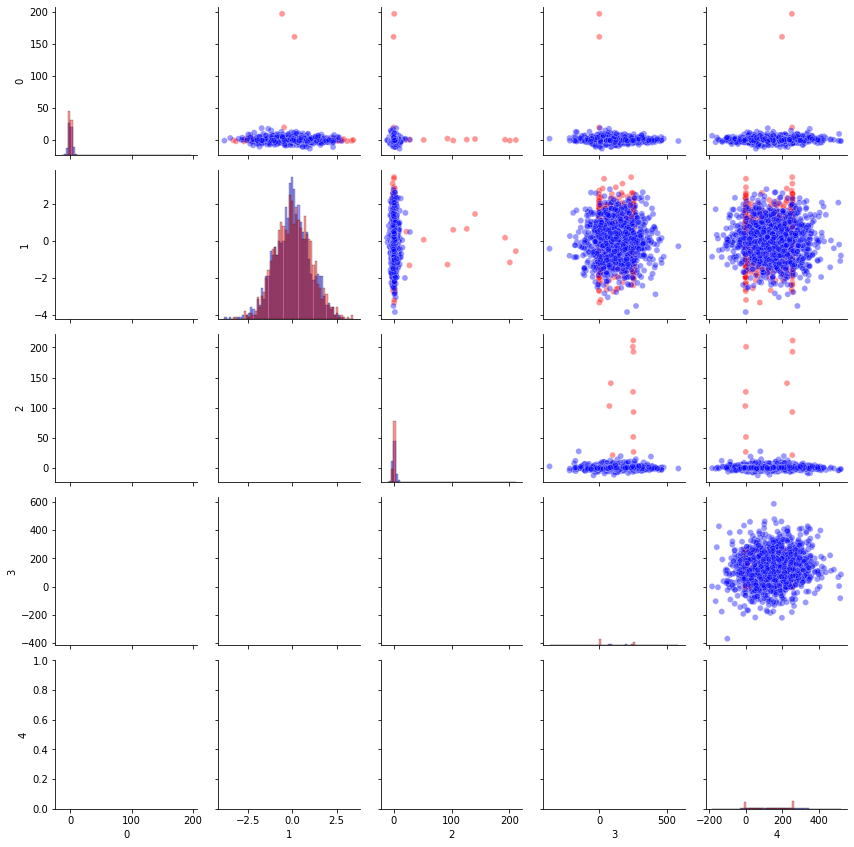

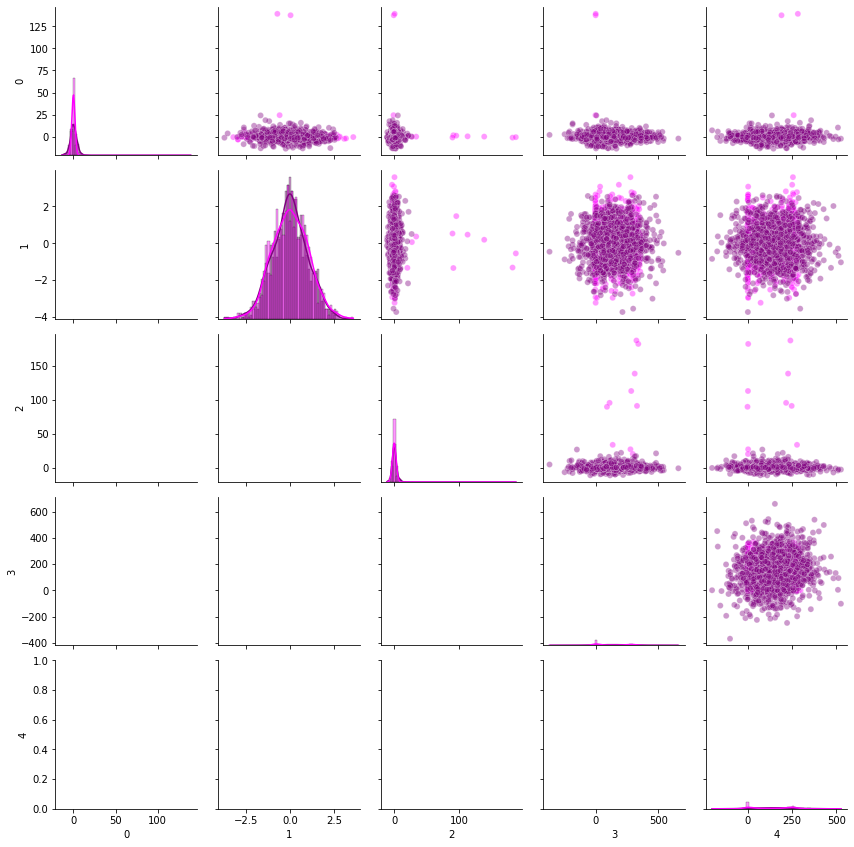

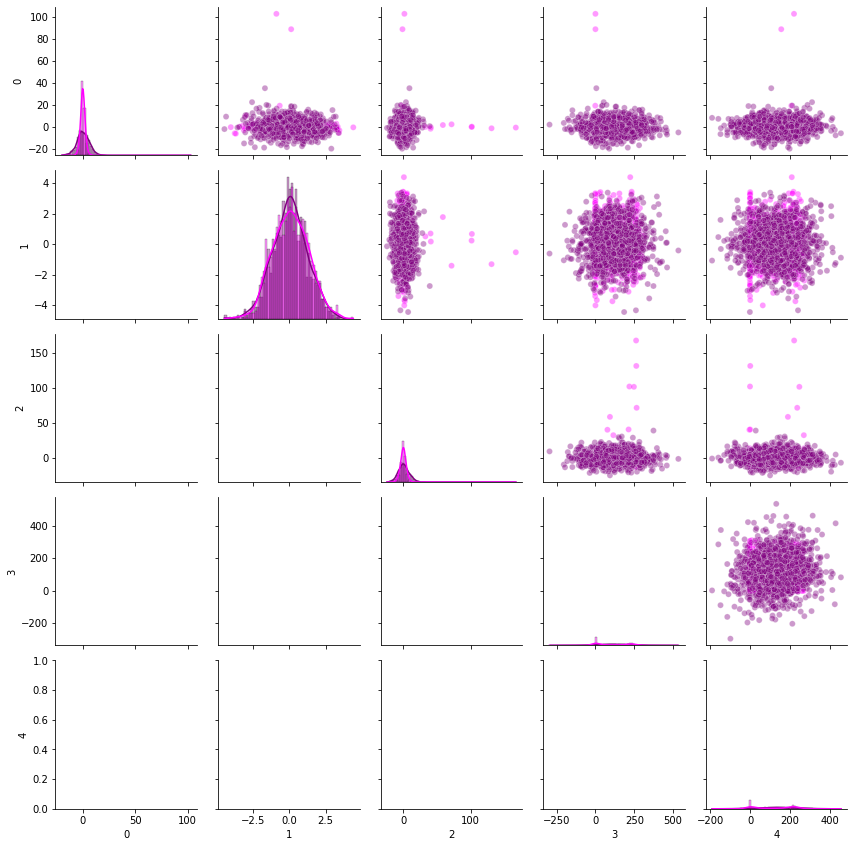

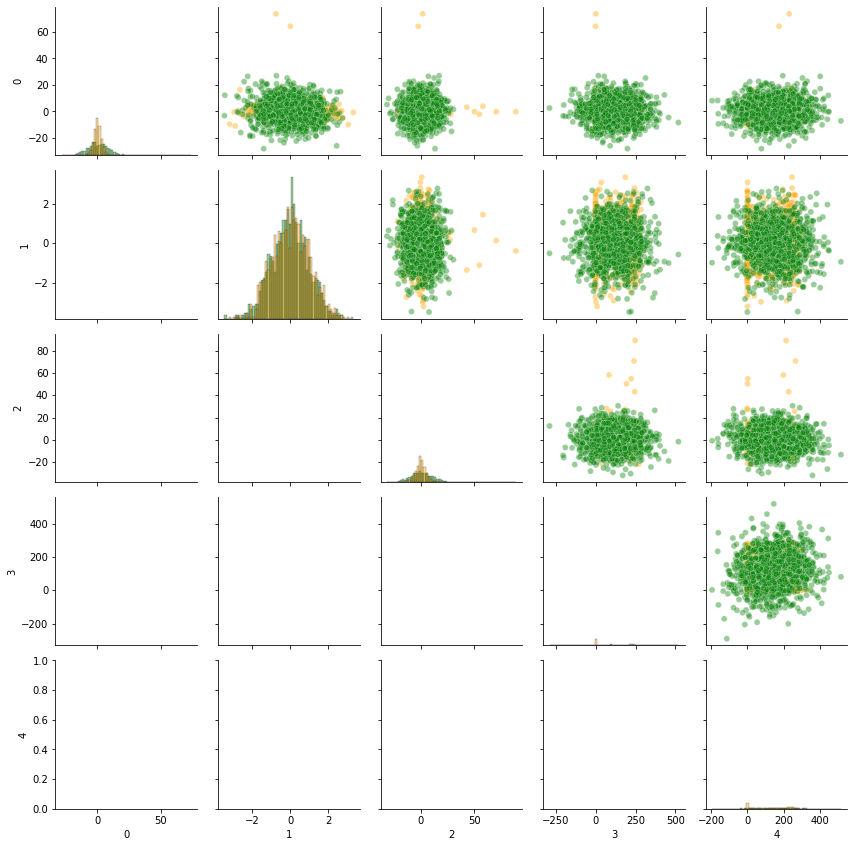

In [54]:
num_samples = target_samples.shape[0]
epochs =200
batch_size = int(num_samples/50)
structure = [[RealNVPDensityEstimatorLayer,[128,128,128]],[RealNVPDensityEstimatorLayer,[128,128,128]],[RealNVPDensityEstimatorLayer,[128,128,128]]]
realnvp = MixedModelDensityEstimator(target_samples, p,structure)
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [05:45<00:00,  1.73s/it, loss = 2511.0478515625]


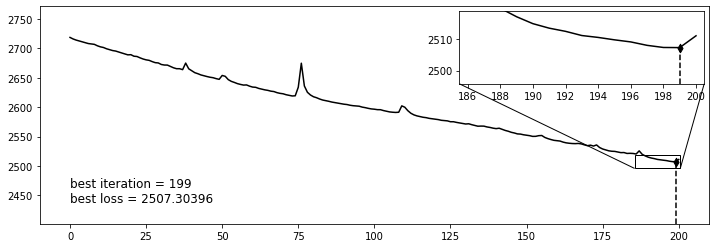

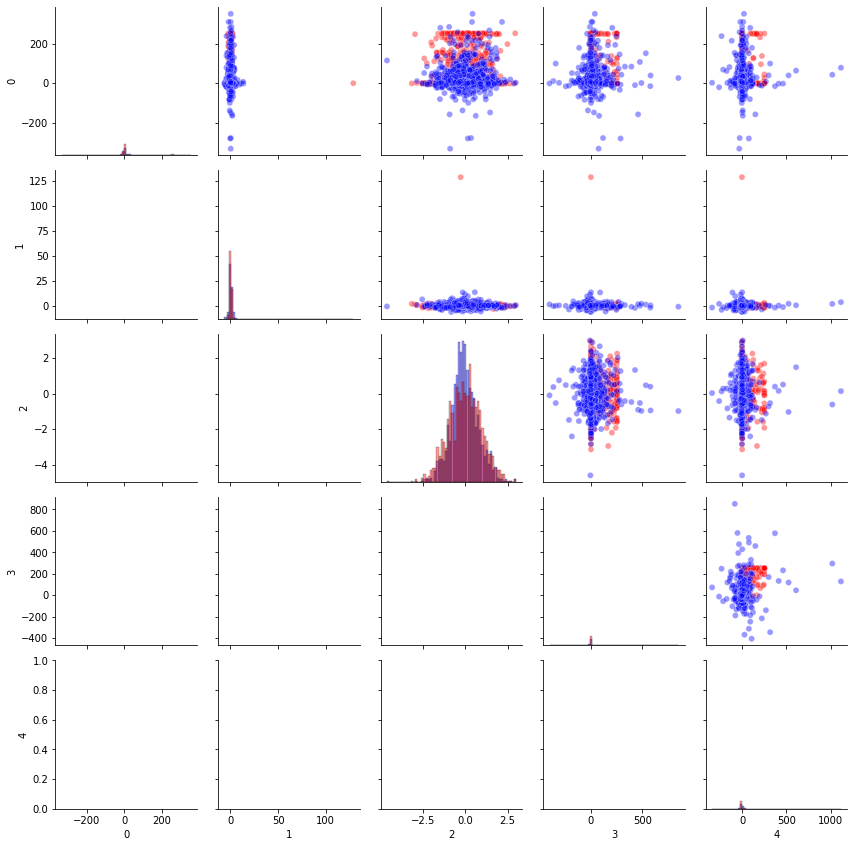

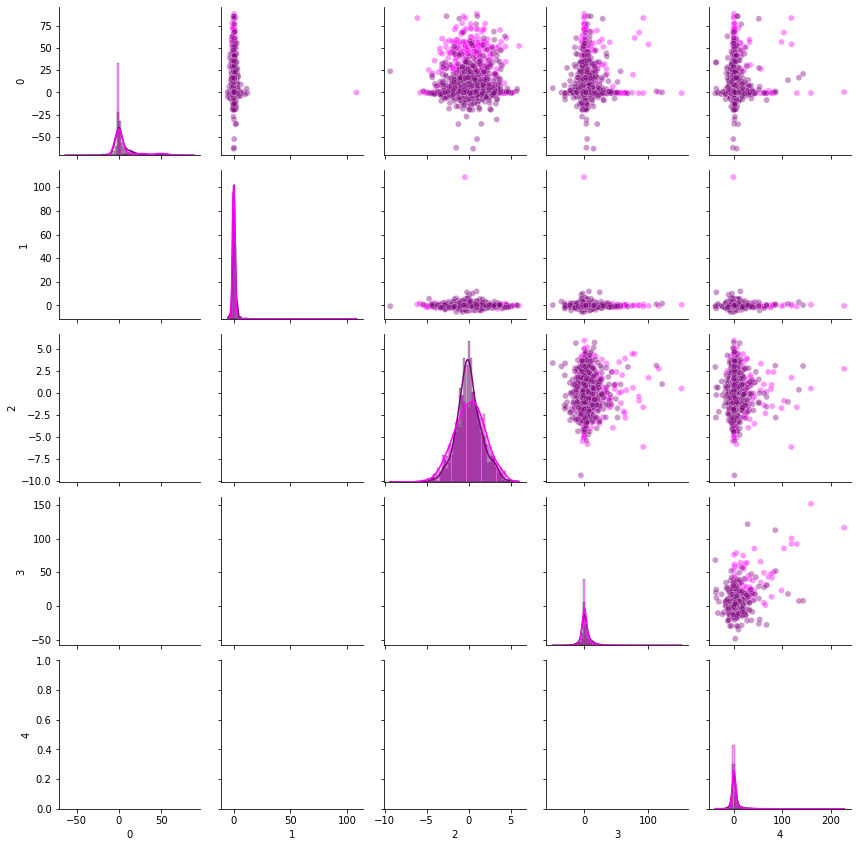

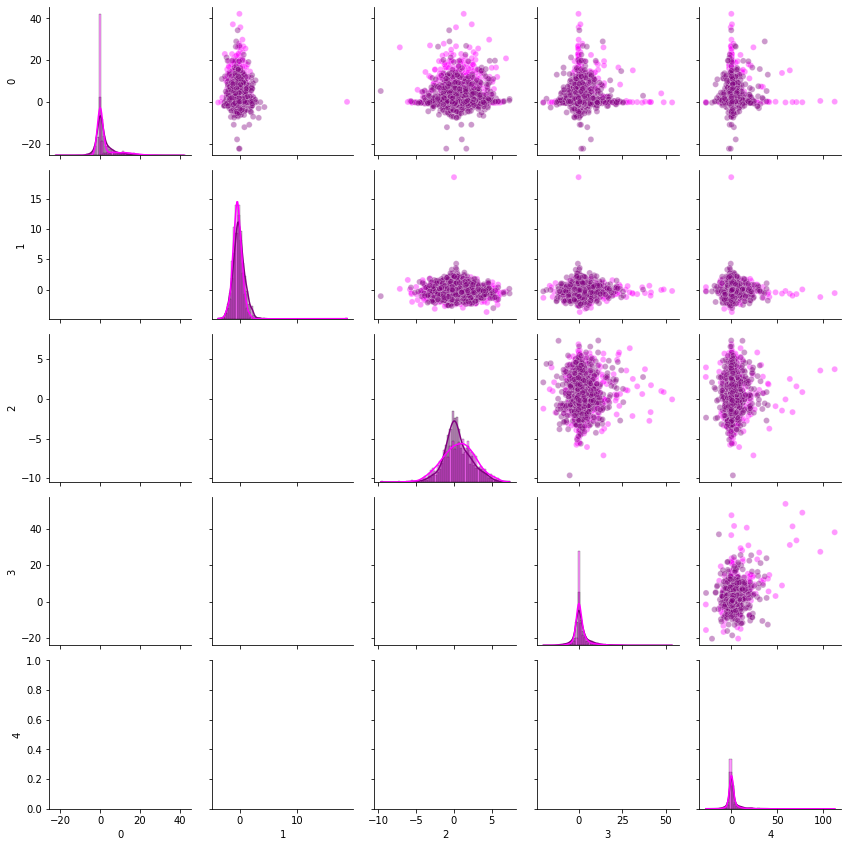

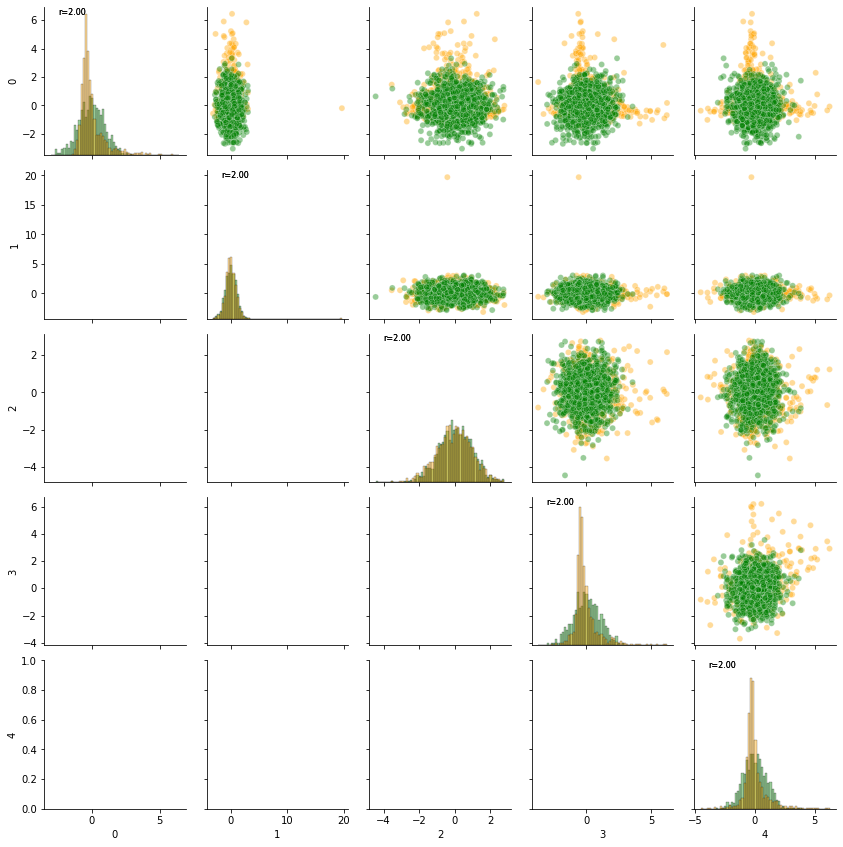

In [39]:
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

<ipython-input-55-44943604a79c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


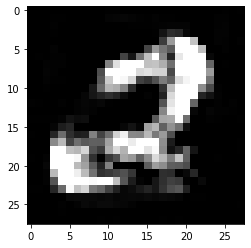

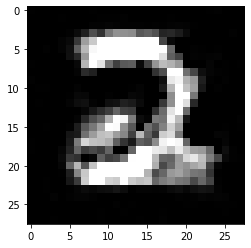

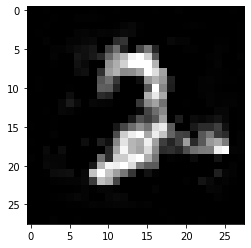

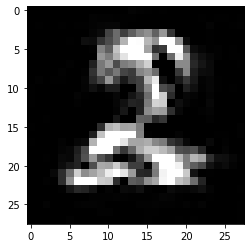

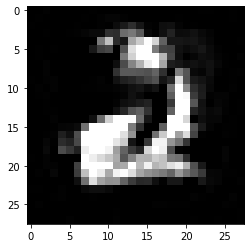

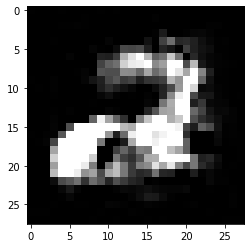

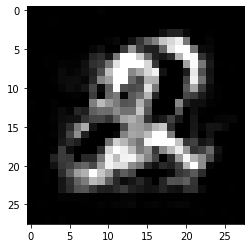

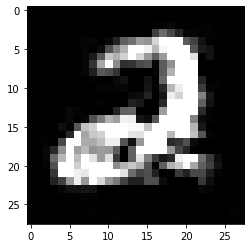

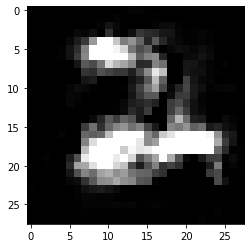

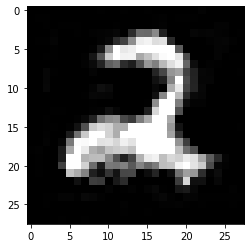

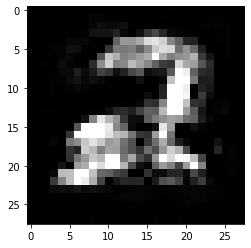

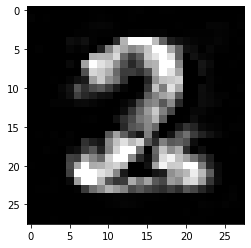

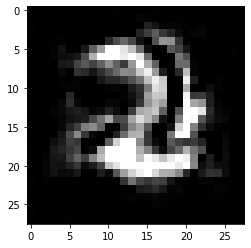

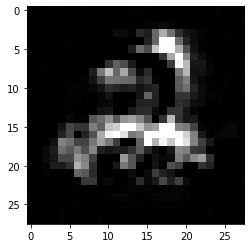

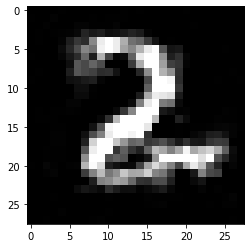

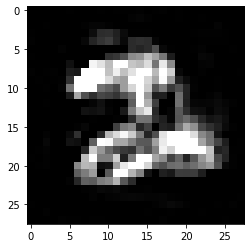

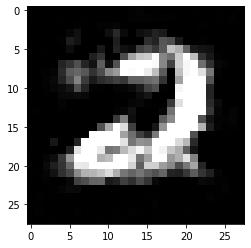

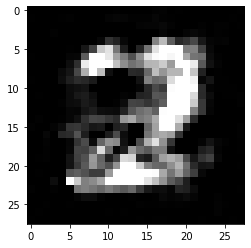

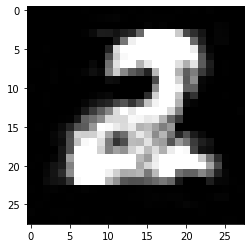

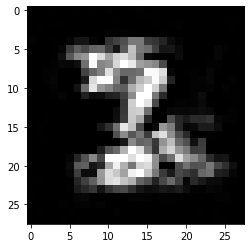

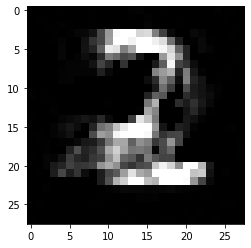

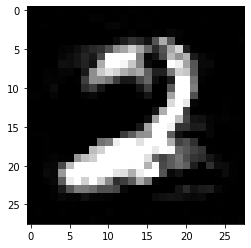

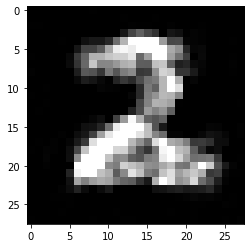

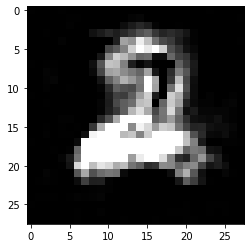

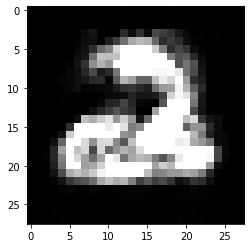

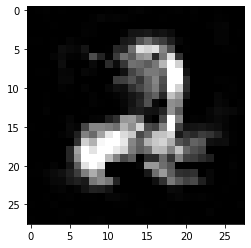

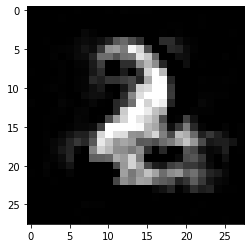

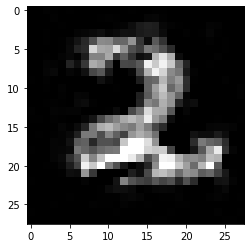

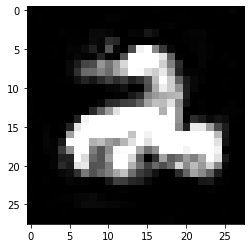

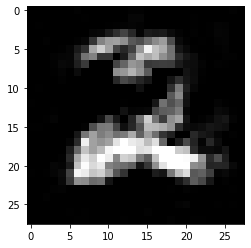

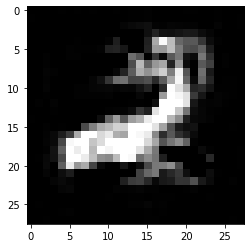

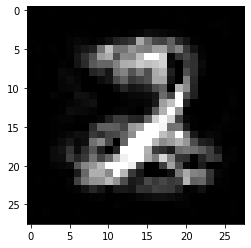

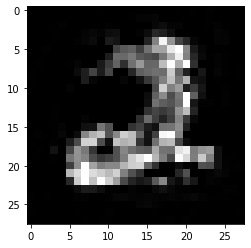

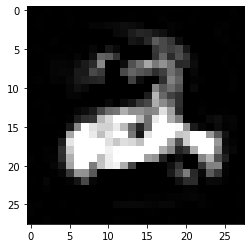

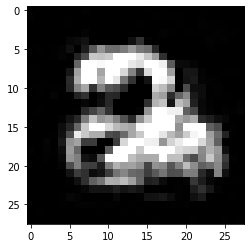

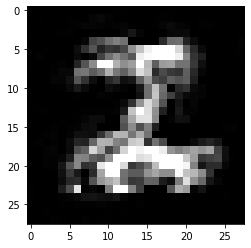

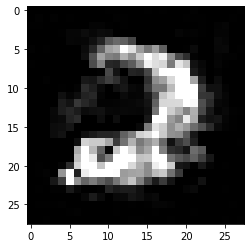

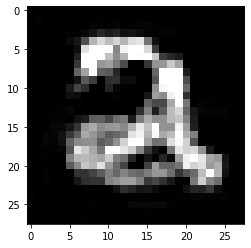

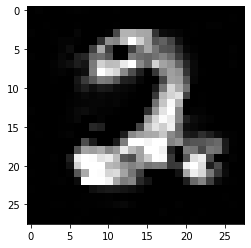

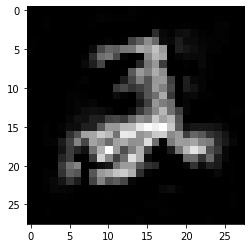

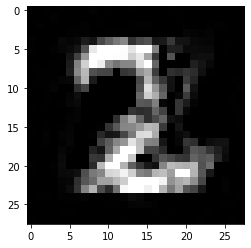

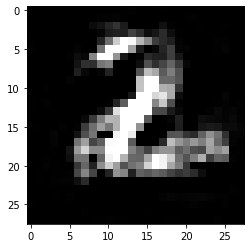

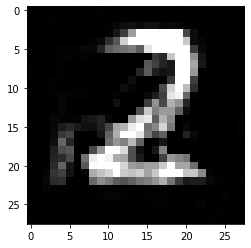

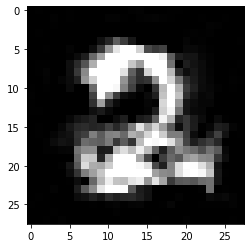

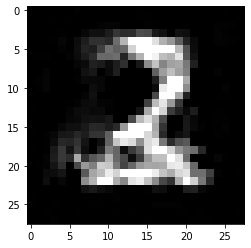

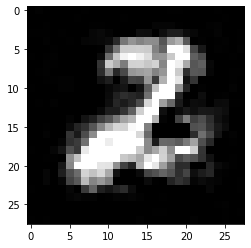

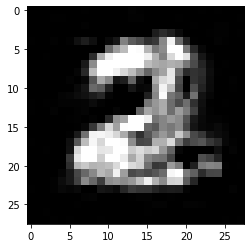

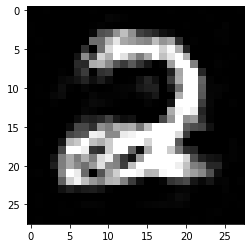

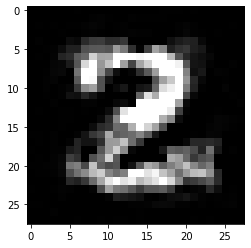

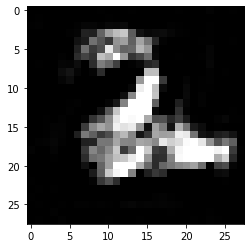

In [55]:
for _ in range(50):
    plt.figure()
    plt.imshow(realnvp.sample_model(1).detach().reshape(28,28),cmap='gray', vmin = 0, vmax = 255,interpolation='none')